# Week 13 Homework: Supervised Learning 

In [1]:
#importing libraries, setting dependencies, etc.

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')


### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [2]:
#creating dataframe and looking at it
bottle = pd.read_csv("bottle.csv", low_memory = False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

First pass: drop uninformative columns (ID labels, object dtypes)

In [4]:
bottle_df = bottle.drop(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID','DIC Quality Comment'], axis=1)
bottle_df.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Pre-processing: Null Values - Visualizing Distribution

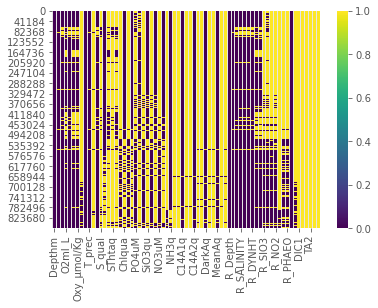

In [5]:
sns.heatmap(bottle_df.isnull(), cmap='viridis');

(Every third column is labeled). This is interesting - it seems that null values comprise about 3/5 of this data set. I will drop empty columns first. I will do this iteratively, as it looks like some of the features have complementary sets of null values (columns are adjacent to one another). I don't understand that. Then, I will drop rows with a high proportion of nulls. As there are over 800K records, I don't mind removing that much data. 

##### Pre-processing: Null Values - Removing Columns Based on Threshold

In [6]:
bottle_df.isna().sum()/len(bottle)*100

Depthm     0.000000
T_degC     1.267600
Salnty     5.475318
O2ml_L    19.501586
STheta     6.092179
            ...    
DIC2      99.974100
TA1       99.759037
TA2       99.972944
pH2       99.998844
pH1       99.990287
Length: 69, dtype: float64

In [7]:
bottle50=bottle_df.dropna(thresh=0.5*len(bottle_df), axis = 1, inplace = False)
bottle50.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [8]:
bottle50.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'Chlqua',
       'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q',
       'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'],
      dtype='object')

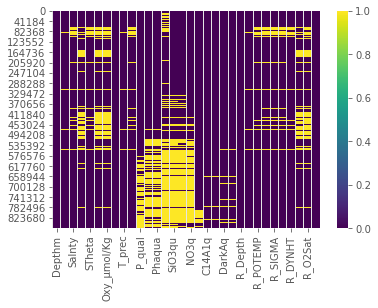

In [9]:
sns.heatmap(bottle50.isnull(), cmap='viridis');

In [10]:
bottle25=bottle_df.dropna(thresh=.25*len(bottle_df), axis=1, inplace = False)
bottle25.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [11]:
bottle25.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q',
       'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4',
       'R_NO3', 'R_NO2', 'R_CHLA', 'R_PHAEO', 'R_PRES'],
      dtype='object')

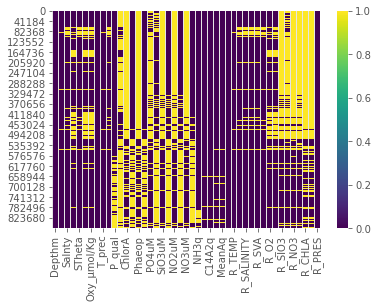

In [12]:
sns.heatmap(bottle25.isnull(), cmap='viridis');

In [13]:
bottle75 = bottle_df.dropna(thresh=0.75*len(bottle_df), axis = 1, inplace = False)
bottle75.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [14]:
bottle75.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_PRES'],
      dtype='object')

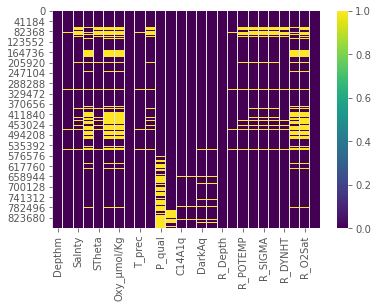

In [15]:
sns.heatmap(bottle75.isnull(),cmap = 'viridis' );

I'm going with dropping all columns with 25% or more null values. So far, I have reduce the number of features from 74 to 26. As I have left the original dataframe unchanged (with the exception of the ID columns), I could always replace features should they prove to be informative (this topic is outside of my knowledge domain). Since we are focusing on temperature and salinity, I will drop those rows that have nulls for both. 

In [16]:
bottle_row_drop = bottle75.dropna(subset = ["T_degC","Salnty"])

In [17]:
bottle_row_drop.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
count,814247.000000,814247.000000,814247.000000,661489.000000,812174.000000,661274.000000,661268.000000,814247.000000,814247.000000,814247.000000,...,814247.000000,814247.000000,813269.000000,814247.000000,812007.000000,812092.000000,808795.000000,661489.000000,659854.000000,814247.000000
mean,221.936839,10.860287,33.841337,3.416704,25.819394,57.103779,148.808694,4.692909,2.017043,2.719339,...,221.937416,10.860309,10.839803,33.841282,25.811010,220.938918,0.433496,3.416736,57.131372,223.428334
std,308.657488,4.224930,0.461636,2.068723,1.167787,37.094137,90.187533,1.870415,0.148013,0.449322,...,308.657223,4.224934,4.239330,0.462775,1.124645,93.483703,0.383012,2.068738,37.090402,311.960419
min,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,3.000000,1.000000,2.000000,...,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000
25%,46.000000,7.750000,33.489000,1.400000,24.965000,21.100000,60.915470,3.000000,2.000000,2.000000,...,46.000000,7.750000,7.730000,33.489000,24.960000,143.700000,0.136000,1.400000,21.100000,46.000000
50%,125.000000,10.110000,33.866000,3.470000,25.996000,54.400000,151.064150,3.000000,2.000000,3.000000,...,125.000000,10.110000,10.100000,33.866000,25.990000,203.200000,0.340000,3.470000,54.400000,126.000000
75%,300.000000,13.930000,34.197000,5.513000,26.646000,97.600000,240.379600,7.000000,2.000000,3.000000,...,300.000000,13.930000,13.920000,34.197000,26.640000,299.800000,0.640000,5.510000,97.600000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,7.000000,3.000000,3.000000,...,5351.000000,31.140000,31.140000,37.034000,250.784000,683.400000,3.880000,11.130000,214.100000,5458.000000


These columns are redundant and will be removed: R_Depth, R_TEMP, R_POTEMP,
       R_SALINITY, R_O2, R_O2Sat

In [18]:
bottle_row_drop.drop(['R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_O2', 'R_O2Sat'], axis=1, inplace = True)

/Users/thevalkyrie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
bottle_row_drop

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,0,10.500,33.4400,NaN,25.64900,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.640,233.0,0.000,0
1,8,10.460,33.4400,NaN,25.65600,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.650,232.5,0.010,8
2,10,10.460,33.4370,NaN,25.65400,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.650,232.8,0.020,10
3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.640,234.1,0.040,19
4,20,10.450,33.4210,NaN,25.64300,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,7,2.0,3.0,NaN,NaN,9.0,9.0,9.0,9.0,23.871,402.4,0.000,0
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,3,2.0,3.0,NaN,4.0,9.0,9.0,9.0,9.0,23.871,402.5,0.008,2
864860,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3,2.0,3.0,NaN,4.0,9.0,9.0,9.0,9.0,23.889,400.8,0.020,5
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,3,2.0,3.0,NaN,NaN,9.0,9.0,9.0,9.0,24.014,389.1,0.040,10


In [20]:
bottle_row_drop.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [21]:
bottle_row_drop.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,814247.000000,814247.000000,814247.000000,661489.000000,812174.000000,661274.000000,661268.000000,814247.000000,814247.000000,814247.000000,623580.000000,757686.000000,799620.000000,799618.000000,792508.000000,792507.000000,812007.000000,812092.000000,808795.000000,814247.000000
mean,221.936839,10.860287,33.841337,3.416704,25.819394,57.103779,148.808694,4.692909,2.017043,2.719339,8.999995,8.944172,8.999991,8.999991,8.999991,8.999991,25.811010,220.938918,0.433496,223.428334
std,308.657488,4.224930,0.461636,2.068723,1.167787,37.094137,90.187533,1.870415,0.148013,0.449322,0.003799,0.525379,0.002959,0.002959,0.002972,0.002972,1.124645,93.483703,0.383012,311.960419
min,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,3.000000,1.000000,2.000000,6.000000,4.000000,8.000000,8.000000,8.000000,8.000000,20.934000,0.400000,0.000000,0.000000
25%,46.000000,7.750000,33.489000,1.400000,24.965000,21.100000,60.915470,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,24.960000,143.700000,0.136000,46.000000
50%,125.000000,10.110000,33.866000,3.470000,25.996000,54.400000,151.064150,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,25.990000,203.200000,0.340000,126.000000
75%,300.000000,13.930000,34.197000,5.513000,26.646000,97.600000,240.379600,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,26.640000,299.800000,0.640000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,250.784000,683.400000,3.880000,5458.000000


Checking for outliers - 

In [22]:
Q1 = bottle_row_drop.quantile(0.25)
Q3 = bottle_row_drop.quantile(0.75)
IQR = Q3 - Q1
IQR

Depthm         254.00000
T_degC           6.18000
Salnty           0.70800
O2ml_L           4.11300
STheta           1.68100
O2Sat           76.50000
Oxy_µmol/Kg    179.46413
RecInd           4.00000
T_prec           0.00000
S_prec           1.00000
P_qual           0.00000
NH3q             0.00000
C14A1q           0.00000
C14A2q           0.00000
DarkAq           0.00000
MeanAq           0.00000
R_SIGMA          1.68000
R_SVA          156.10000
R_DYNHT          0.50400
R_PRES         256.00000
dtype: float64

In [23]:
outliers = ((bottle_row_drop < (Q1 - 1.5 * IQR)) |(bottle_row_drop > (Q3 + 1.5 * IQR)))

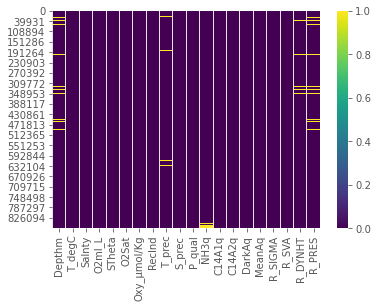

In [24]:
#Visualizing distribution of outliers
sns.heatmap(outliers, cmap = 'viridis');

There doesn't seem to be a whole lot of outliers in this data set. I could drop them: 

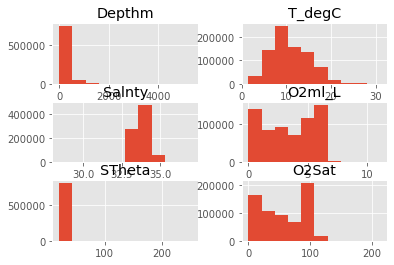

In [25]:
bottle_row_drop.hist(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']);

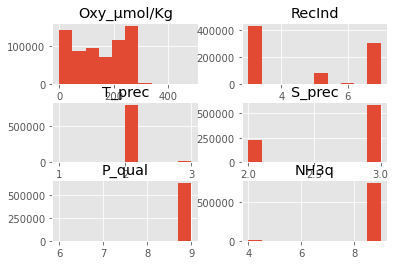

In [26]:
bottle_row_drop.hist(['Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'NH3q']);

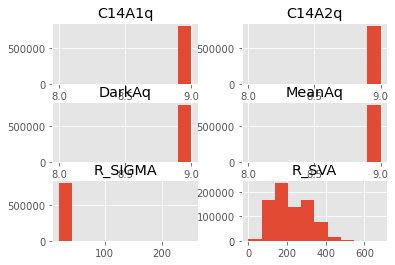

In [27]:
bottle_row_drop.hist(['C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_SIGMA', 'R_SVA']);

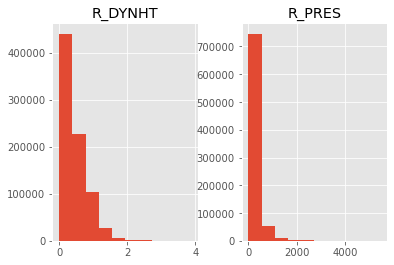

In [28]:
bottle_row_drop.hist(['R_DYNHT', 'R_PRES']);

In [29]:
bottle_out = bottle_row_drop[~((bottle_row_drop < (Q1 - 1.5 * IQR)) |(bottle_row_drop > (Q3 + 1.5 * IQR))).any(axis=1)]
print(bottle_out.shape)

(736911, 20)


I don't want to lose 10K records. I will replace nulls with the median instead:

In [30]:
df_bottle = bottle_row_drop
df_bottle.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,233.0,0.00,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.65,232.5,0.01,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.65,232.8,0.02,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,234.1,0.04,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,234.0,0.04,20


In [31]:
df_bottle.isna().sum()

Depthm              0
T_degC              0
Salnty              0
O2ml_L         152758
STheta           2073
O2Sat          152973
Oxy_µmol/Kg    152979
RecInd              0
T_prec              0
S_prec              0
P_qual         190667
NH3q            56561
C14A1q          14627
C14A2q          14629
DarkAq          21739
MeanAq          21740
R_SIGMA          2240
R_SVA            2155
R_DYNHT          5452
R_PRES              0
dtype: int64

In [32]:
df_bott = bottle_row_drop

In [33]:
df_bott.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,233.0,0.00,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.65,232.5,0.01,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.65,232.8,0.02,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,234.1,0.04,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,25.64,234.0,0.04,20


In [34]:
df_bott['O2ml_L']=df_bott['O2ml_L'].fillna(df_bott['O2ml_L'].median())

<ipython-input-34-d6dfb17b401e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['O2ml_L']=df_bott['O2ml_L'].fillna(df_bott['O2ml_L'].median())


In [35]:
df_bott['STheta']=df_bott['STheta'].fillna(df_bott['STheta'].median())

<ipython-input-35-568e4c23461a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['STheta']=df_bott['STheta'].fillna(df_bott['STheta'].median())


In [36]:
df_bott['STheta']=df_bott['STheta'].fillna(df_bott['STheta'].median())

<ipython-input-36-568e4c23461a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['STheta']=df_bott['STheta'].fillna(df_bott['STheta'].median())


In [37]:
df_bott['O2Sat']=df_bott['O2Sat'].fillna(df_bott['O2Sat'].median())

<ipython-input-37-6a95e96e2a51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['O2Sat']=df_bott['O2Sat'].fillna(df_bott['O2Sat'].median())


In [38]:
df_bott['Oxy_µmol/Kg']=df_bott['Oxy_µmol/Kg'].fillna(df_bott['Oxy_µmol/Kg'].median())

<ipython-input-38-2fccfa85a4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['Oxy_µmol/Kg']=df_bott['Oxy_µmol/Kg'].fillna(df_bott['Oxy_µmol/Kg'].median())


In [39]:
df_bott['P_qual']=df_bott['P_qual'].fillna(df_bott['P_qual'].median())

<ipython-input-39-ad6737061904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['P_qual']=df_bott['P_qual'].fillna(df_bott['P_qual'].median())


In [40]:
df_bott['NH3q']=df_bott['NH3q'].fillna(df_bott['NH3q'].median())

<ipython-input-40-884e4b1e620b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['NH3q']=df_bott['NH3q'].fillna(df_bott['NH3q'].median())


In [41]:
df_bott['C14A1q']=df_bott['C14A1q'].fillna(df_bott['C14A1q'].median())

<ipython-input-41-0be73fa16b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['C14A1q']=df_bott['C14A1q'].fillna(df_bott['C14A1q'].median())


In [42]:
df_bott['C14A2q']=df_bott['C14A2q'].fillna(df_bott['C14A2q'].median())

<ipython-input-42-1a02c484a366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['C14A2q']=df_bott['C14A2q'].fillna(df_bott['C14A2q'].median())


In [43]:
df_bott['DarkAq']=df_bott['DarkAq'].fillna(df_bott['DarkAq'].median())

<ipython-input-43-15a49040bf53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['DarkAq']=df_bott['DarkAq'].fillna(df_bott['DarkAq'].median())


In [44]:
df_bott['P_qual']=df_bott['P_qual'].fillna(df_bott['P_qual'].median())

<ipython-input-44-ad6737061904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['P_qual']=df_bott['P_qual'].fillna(df_bott['P_qual'].median())


In [45]:
df_bott['DarkAq']=df_bott['DarkAq'].fillna(df_bott['DarkAq'].median())

<ipython-input-45-15a49040bf53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['DarkAq']=df_bott['DarkAq'].fillna(df_bott['DarkAq'].median())


In [46]:
df_bott['MeanAq']=df_bott['MeanAq'].fillna(df_bott['MeanAq'].median())

<ipython-input-46-3250f3c9bd84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['MeanAq']=df_bott['MeanAq'].fillna(df_bott['MeanAq'].median())


In [47]:
df_bott['R_SIGMA']=df_bott['R_SIGMA'].fillna(df_bott['R_SIGMA'].median())

<ipython-input-47-ecc6f26c1126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['R_SIGMA']=df_bott['R_SIGMA'].fillna(df_bott['R_SIGMA'].median())


In [48]:
df_bott['R_SVA']=df_bott['R_SVA'].fillna(df_bott['R_SVA'].median())

<ipython-input-48-485737d92821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['R_SVA']=df_bott['R_SVA'].fillna(df_bott['R_SVA'].median())


In [49]:
df_bott['R_DYNHT']=df_bott['R_DYNHT'].fillna(df_bott['R_DYNHT'].median())

<ipython-input-49-671dae1b0aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bott['R_DYNHT']=df_bott['R_DYNHT'].fillna(df_bott['R_DYNHT'].median())


In [50]:
df_bott.isna().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_PRES         0
dtype: int64

In [51]:
df_bott.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000
mean,221.936839,10.860287,33.841337,3.426702,25.819843,56.595819,149.232444,4.692909,2.017043,2.719339,8.999996,8.948050,8.999991,8.999991,8.999991,8.999991,25.811503,220.891970,0.432870,223.428334
std,308.657488,4.224930,0.461636,1.864716,1.166334,33.445253,81.279801,1.870415,0.148013,0.449322,0.003325,0.507002,0.002932,0.002932,0.002932,0.002932,1.123136,93.364362,0.381804,311.960419
min,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,3.000000,1.000000,2.000000,6.000000,4.000000,8.000000,8.000000,8.000000,8.000000,20.934000,0.400000,0.000000,0.000000
25%,46.000000,7.750000,33.489000,1.910000,24.968000,29.000000,83.107190,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,24.960000,143.800000,0.140000,46.000000
50%,125.000000,10.110000,33.866000,3.470000,25.996000,54.400000,151.064150,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,25.990000,203.200000,0.340000,126.000000
75%,300.000000,13.930000,34.197000,5.290000,26.645000,91.410000,230.396800,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,26.640000,299.600000,0.640000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,250.784000,683.400000,3.880000,5458.000000


In [52]:
df_bott.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

Standardize

In [53]:
from sklearn.preprocessing import StandardScaler
bottle_std = StandardScaler().fit_transform(df_bott)

In [54]:
bottle_std


array([[-0.71903966, -0.08527656, -0.86938071, ...,  0.12968586,
        -1.13375077, -0.71620775],
       [-0.69312095, -0.09474418, -0.86938071, ...,  0.12433049,
        -1.10755931, -0.69056346],
       [-0.68664127, -0.09474418, -0.87587934, ...,  0.12754371,
        -1.08136784, -0.68415239],
       ...,
       [-0.70284046,  1.85369166, -0.92353598, ...,  1.92694661,
        -1.08136784, -0.70018007],
       [-0.68664127,  1.72800903, -0.94259864, ...,  1.80163105,
        -1.02898491, -0.68415239],
       [-0.67044207,  1.57936742, -0.98202367, ...,  1.66132047,
        -0.97922112, -0.6681247 ]])

In [55]:

df_bottle_std = pd.DataFrame(bottle_std, columns=['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'])
   

In [56]:
df_bottle_std.head(5)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,-0.719040,-0.085277,-0.869381,0.023219,-0.146479,-0.065654,0.022536,-0.905099,-6.871288,-1.600944,0.001108,0.102465,0.002932,0.002932,0.002932,0.002932,-0.152700,0.129686,-1.133751,-0.716208
1,-0.693121,-0.094744,-0.869381,0.023219,-0.140477,-0.065654,0.022536,-0.905099,-0.115143,-1.600944,0.001108,0.102465,0.002932,0.002932,0.002932,0.002932,-0.143796,0.124330,-1.107559,-0.690563
2,-0.686641,-0.094744,-0.875879,0.023219,-0.142192,-0.065654,0.022536,1.233466,-0.115143,0.624631,0.001108,0.102465,0.002932,0.002932,0.002932,0.002932,-0.143796,0.127544,-1.081368,-0.684152
3,-0.657483,-0.097111,-0.912705,0.023219,-0.151623,-0.065654,0.022536,-0.905099,-0.115143,-1.600944,0.001108,0.102465,0.002932,0.002932,0.002932,0.002932,-0.152700,0.141468,-1.028985,-0.655303
4,-0.654243,-0.097111,-0.910539,0.023219,-0.151623,-0.065654,0.022536,1.233466,-0.115143,0.624631,0.001108,0.102465,0.002932,0.002932,0.002932,0.002932,-0.152700,0.140397,-1.028985,-0.652097


In [57]:
df_bottle_std.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05,8.142470e+05
mean,3.800957e-13,7.988391e-16,-4.046256e-14,2.789942e-13,8.716111e-15,-3.598202e-13,1.890061e-13,-1.280949e-13,3.827893e-13,1.949974e-12,-5.556876e-14,-1.614747e-13,9.789887e-14,9.789887e-14,9.821379e-14,9.789887e-14,3.933131e-15,3.219964e-15,-1.397253e-13,1.144669e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-7.190397e-01,-2.229692e+00,-1.171993e+01,-1.843018e+00,-4.189064e+00,-1.695184e+00,-1.841385e+00,-9.050986e-01,-6.871288e+00,-1.600944e+00,-9.023558e+02,-9.759441e+00,-3.410572e+02,-3.410572e+02,-3.410572e+02,-3.410572e+02,-4.342755e+00,-2.361630e+00,-1.133751e+00,-7.162078e-01
25%,-5.700071e-01,-7.361753e-01,-7.632364e-01,-8.133698e-01,-7.303604e-01,-8.251047e-01,-8.135514e-01,-9.050986e-01,-1.151432e-01,-1.600944e+00,1.108210e-03,1.024649e-01,2.932060e-03,2.932060e-03,2.932060e-03,2.932060e-03,-7.581477e-01,-8.257114e-01,-7.670702e-01,-5.687531e-01
50%,-3.140598e-01,-1.775858e-01,5.342512e-02,2.321941e-02,1.510346e-01,-6.565417e-02,2.253582e-02,-9.050986e-01,-1.151432e-01,6.246313e-01,1.108210e-03,1.024649e-01,2.932060e-03,2.932060e-03,2.932060e-03,2.932060e-03,1.589277e-01,-1.894939e-01,-2.432409e-01,-3.123101e-01
75%,2.529121e-01,7.265717e-01,7.704409e-01,9.992402e-01,7.074796e-01,1.040931e+00,9.985803e-01,1.233466e+00,-1.151432e-01,6.246313e-01,1.108210e-03,1.024649e-01,2.932060e-03,2.932060e-03,2.932060e-03,2.932060e-03,7.376646e-01,8.430206e-01,5.425031e-01,2.518644e-01
max,1.661734e+01,4.800014e+00,6.915981e+00,4.131087e+00,1.928816e+02,4.709316e+00,4.139645e+00,1.233466e+00,6.641001e+00,6.246313e-01,1.108210e-03,1.024649e-01,2.932060e-03,2.932060e-03,2.932060e-03,2.932060e-03,2.003075e+02,4.953799e+00,9.028538e+00,1.677961e+01


### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

In [58]:
df_bott.corr()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Depthm,1.000000,-0.676504,0.572867,-0.535087,0.581936,-0.541230,-0.535047,0.078024,0.025977,0.003203,0.000686,0.008779,0.002005,0.002005,0.001857,0.002005,0.602819,-0.665478,0.898360,0.999994
T_degC,-0.676504,1.000000,-0.505266,0.716225,-0.826863,0.766979,0.716511,-0.062625,-0.047593,-0.036218,-0.000525,0.003134,-0.004160,-0.004160,-0.004010,-0.004160,-0.860176,0.962014,-0.793797,-0.675116
Salnty,0.572867,-0.505266,1.000000,-0.740504,0.602238,-0.711004,-0.740326,0.065717,-0.019075,-0.083097,0.001950,0.022224,0.004004,0.004004,0.003817,0.004004,0.627124,-0.697127,0.666003,0.571640
O2ml_L,-0.535087,0.716225,-0.740504,1.000000,-0.693260,0.992071,0.999787,-0.064269,-0.000623,0.021607,-0.001494,0.014401,-0.004064,-0.004064,-0.003849,-0.004064,-0.718040,0.798885,-0.686006,-0.533519
STheta,0.581936,-0.826863,0.602238,-0.693260,1.000000,-0.724865,-0.693843,0.060360,0.026191,0.007124,0.000879,0.004198,0.004184,0.004184,0.004021,0.004184,0.958232,-0.859599,0.698099,0.580637
O2Sat,-0.541230,0.766979,-0.711004,0.992071,-0.724865,1.000000,0.992440,-0.064146,-0.010782,0.029104,-0.001395,0.011564,-0.004545,-0.004545,-0.004311,-0.004545,-0.750670,0.836115,-0.692889,-0.539703
Oxy_µmol/Kg,-0.535047,0.716511,-0.740326,0.999787,-0.693843,0.992440,1.000000,-0.064499,-0.000698,0.021577,-0.001494,0.014119,-0.004073,-0.004073,-0.003857,-0.004073,-0.718280,0.799116,-0.685917,-0.533480
RecInd,0.078024,-0.062625,0.065717,-0.064269,0.060360,-0.064146,-0.064499,1.000000,0.034981,0.358089,0.001003,0.014667,0.002654,0.002654,0.002654,0.002654,0.060409,-0.065802,0.086815,0.077883
T_prec,0.025977,-0.047593,-0.019075,-0.000623,0.026191,-0.010782,-0.000698,0.034981,1.000000,0.098015,0.000128,0.011798,0.000338,0.000338,0.000338,0.000338,0.026667,-0.030291,0.017805,0.025999
S_prec,0.003203,-0.036218,-0.083097,0.021607,0.007124,0.029104,0.021577,0.358089,0.098015,1.000000,-0.000692,-0.064003,-0.001831,-0.001831,-0.001831,-0.001831,0.005921,-0.005637,0.015326,0.003286


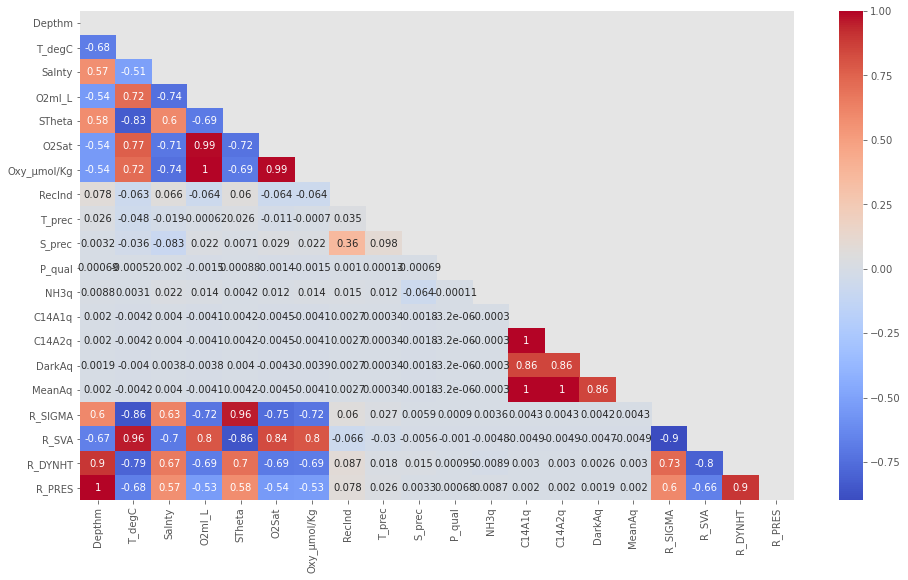

In [59]:
#I am plotting a lower triangular matrix - easier for me to read
plt.figure(figsize=(16,9))
 
corr_mx = df_bott.corr() # correlation matrix
 
matrix = np.triu(corr_mx) # take upper correlation matrix
 
sns.heatmap(corr_mx, mask=matrix, annot=True, cmap="coolwarm");

Temperature and salinity are moderately correlated (-0.51). What is strongly correlated with water temperature? I am going to define as "high" any correlation above |0.70|. The attributes highly correlated with T_degC are: O2ml_L (dissolved oxygen), STheta, O2Sat, Oxy_umol/Kg, RSIGMA, R_SVA, and R_DYNHT. 

The heat map shows regions of redundancy. For example, C14A2q is highly correlated with C24A2q, DarkAq, and MeanAq. We could probably eliminate all but one of these. Similarly, RSIGMA is highly correlated wth R_SVA and R_DYNHT. We could probably eliminate all but one of these. The oxygen features (O2ml_L, O2Sat, and Oxy_umol/Kg) form a highly correlated cluster and this feature set could probably be reduced to one as well. 

### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df_bottle_std['Salnty']).reshape(-1,1)
# here, I selected the unstandardized feature for the target so that the predictions would be expressed on a meaningful scale.
y = np.array(df_bottle['T_degC']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 14)

In [72]:
X.shape

(814247, 1)

In [73]:
y.shape

(814247, 1)

In [74]:
#Checking the predictor:
X_train

array([[-0.4881276 ],
       [ 0.70112217],
       [ 1.19718446],
       ...,
       [-0.36465358],
       [ 0.58198058],
       [ 0.04259407]])

In [75]:
X_test

array([[-1.51924397],
       [-0.62459888],
       [-0.2498444 ],
       ...,
       [-0.36248736],
       [-1.95681857],
       [-0.76107017]])

In [76]:
reg_bottle = LinearRegression()
reg_bottle.fit(X_train, y_train)

LinearRegression()

In [77]:
#predicting the water temperature based on salinity

y_pred = reg_bottle.predict(X_test)

In [78]:
#y_pred.shape
y_pred

array([[14.10546925],
       [12.19495608],
       [11.39466849],
       ...,
       [11.63521736],
       [15.0399091 ],
       [12.48639029]])

So, for a salinity of -1.51924397, we predict a temperature of 14.1 degrees C. Note that these values are expressed on the standardized scale. We'd have to do a back-transformation to place them on a meaninful scale. 

In [79]:
#Model accuracy score: 

score = reg_bottle.score(X_test, y_test)
score

0.25489015641532176

That's not a great score.

### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [81]:
#MSE

from sklearn.metrics import mean_absolute_error
mse= mean_absolute_error(y_test, y_pred)
round(mse, 3) #rounding to 3 decimal places

2.671

In [82]:
# R-squared

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2= r2_score(y_test, y_pred)
round(r2, 3)

0.255

### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

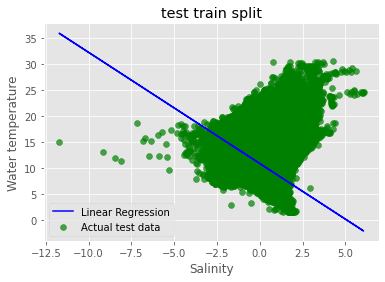

In [83]:
plt.plot(X_test,y_pred,label='Linear Regression',color='b')
plt.scatter(X_test,y_test, label='Actual test data',color='g',alpha=0.7)
plt.legend()
plt.xlabel("Salinity")
plt.ylabel("Water temperature")
plt.title('test train split')
plt.show()

### 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression is basically a extension of a linear model. Additional features are engineered by exponentiating one or more of the original features. (Interaction terms can also be created by taking products of two or more features.) The highest exponent is the degree of the polynomial, so, for a data set with feature X, a polynomial of degree 3 will include a feature that is X^3. It's unusual to have a polynomial of degree greater than four, as those are prone to over-fitting. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

Why do we care? Exponentiation can "sharpen" the signal by increasing the distance between values - small input values become even smaller, and large input values become even larger. Also, some machine learning algorithms perform better with polynomial input features. Inputting polynomial features into linear models can allow a model to find nonlinear patterns in the data. 


### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly_reg = PolynomialFeatures(degree=2,interaction_only=False)
X_poly=poly_reg.fit_transform(X_test)

In [87]:
X_poly

array([[ 1.        , -1.51924397,  2.30810224],
       [ 1.        , -0.62459888,  0.39012376],
       [ 1.        , -0.2498444 ,  0.06242222],
       ...,
       [ 1.        , -0.36248736,  0.13139709],
       [ 1.        , -1.95681857,  3.8291389 ],
       [ 1.        , -0.76107017,  0.5792278 ]])

In [88]:
lreg = LinearRegression()

In [89]:
lreg.fit(X_poly, y_test)

LinearRegression()

In [90]:
y_prediction = lreg.predict(poly_reg.transform(X))
accuracy = lreg.score(poly_reg.transform(X), y)
accuracy

0.27041353708658056

### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

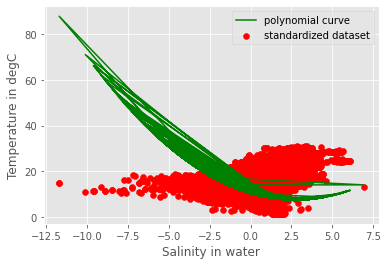

In [92]:
plt.scatter(X,y, color='red',label='standardized dataset')
plt.plot(X, y_prediction,color='g',label='polynomial curve')
plt.xlabel('Salinity in water')
plt.ylabel('Temperature in degC')
plt.legend()
plt.show()

I think the polynomial reqression is pretty uninformative. 

Here are the screen shots of the two required completed DataCamp courses:

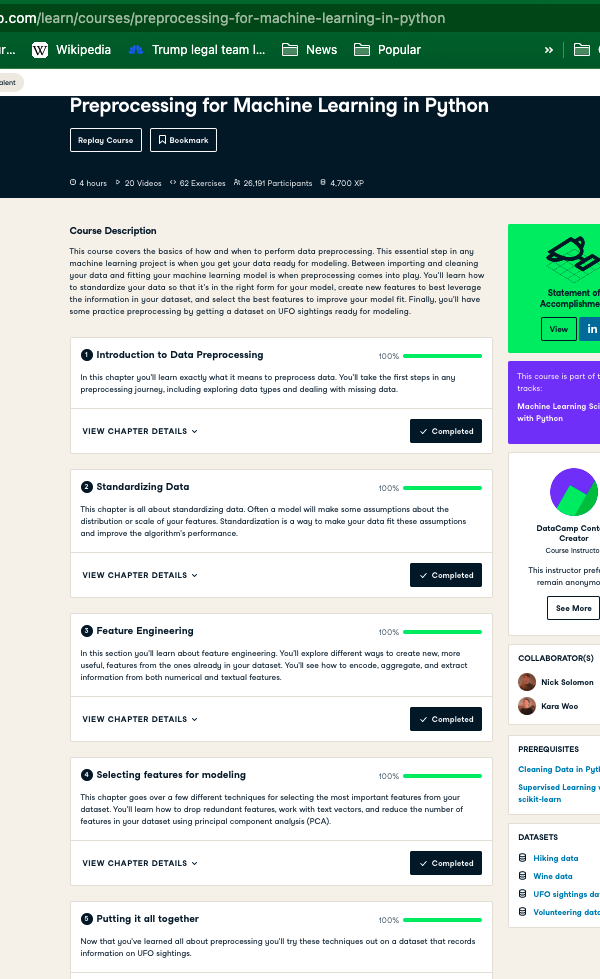

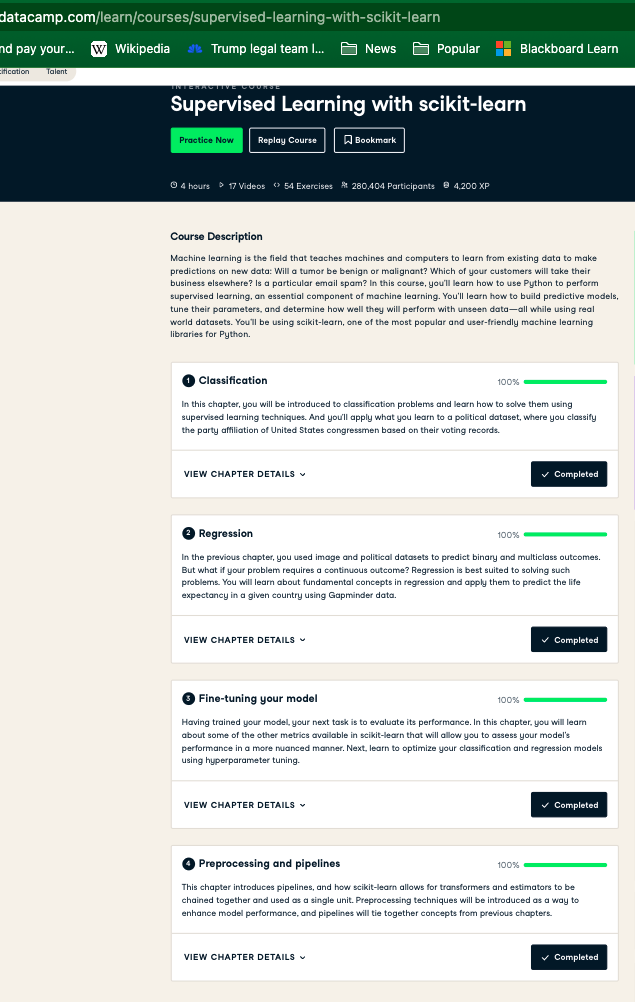